**Aim** : 
 

1.   To Find variables that are significant in predicting the demand for shared bikes.
2.   How well those variables describe the bike demands




**Steps to create a model are as follows:**


1.  Read and understand the data
2.  Preparing the data for modelling (split the train and test data to build a model)
3. Training the model
4.  Residual analysis
5.   Prediction and evaluation on the test data





**Step 1** : Read and understand the data 

In [ ]:
#Importing the required python libraries
import warnings
warnings.filterwarnings(action = "ignore")
import pandas as pd
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
import statsmodels.api as sm 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
#Readng the data set
day = pd.read_csv("/content/drive/MyDrive/day.csv") 
print(day.shape)

(730, 16)


In [ ]:
day.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [ ]:
print(day.duplicated().sum()) #to check duplicacy in dataset


0


In [ ]:
print(day.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB
None


In [ ]:
day.isnull().sum() #checking null values

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [ ]:
day.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [ ]:
#Data Cleaning dropping unwanted columns
day = day.drop(['instant','casual','registered','dteday'],axis = 1)

In [ ]:
day.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [ ]:
day['season'].unique()

array([1, 2, 3, 4])

Data Preparation

In [ ]:
day['season'] = day['season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})
day['mnth'] = day['mnth'].map({1:'January',2:'February',3:'March',4:'April',5:'May',6:'June',7:'July',8:'August',9:'September',10:'October',11:'November',12:'December'})
day['weekday'] = day['weekday'].map({6:'Monday',0:'Tuesday',1:'Wednesday',2:'Thursday',3:'Friday',4:'Saturday',5:'Sunday'})
day['workingday'] = day['workingday'].map({1:'Workingday',0:'Holiday'})
day['weathersit'] = day['weathersit'].map({1:'Clear_or_Cloudy',2:'Mist_and_Cloudy',3:'Light_snow_rain_thunderstrom',4:'Tempestuous'})
day['yr'] = day['yr'].map({0:'2018',1:'2019'})
day['holiday'] = day['holiday'].map({1:'Holiday',0:'Workingday'})

In [ ]:
day['season'].unique()

array(['spring', 'summer', 'fall', 'winter'], dtype=object)

In [ ]:
day['mnth'].unique()

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December'],
      dtype=object)

In [ ]:
day['weekday'].unique()

array(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday',
       'Sunday'], dtype=object)

In [ ]:
day['workingday'].unique()

array(['Holiday', 'Workingday'], dtype=object)

In [ ]:
day['weathersit'].unique()

array(['Mist_and_Cloudy', 'Clear_or_Cloudy',
       'Light_snow_rain_thunderstrom'], dtype=object)

In [ ]:
day.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    object 
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    object 
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    object 
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(1), object(7)
memory usage: 68.6+ KB


Identify outliers

In [ ]:
day.describe()

,temp,atemp,hum,windspeed,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000
mean,20.319259,23.726322,62.765175,12.763620,4508.006849
std,7.506729,8.150308,14.237589,5.195841,1936.011647
min,2.424346,3.953480,0.000000,1.500244,22.000000
25%,13.811885,16.889713,52.000000,9.041650,3169.750000
50%,20.465826,24.368225,62.625000,12.125325,4548.500000
75%,26.880615,30.445775,72.989575,15.625589,5966.000000
max,35.328347,42.044800,97.250000,34.000021,8714.000000


check outliers for continous variables

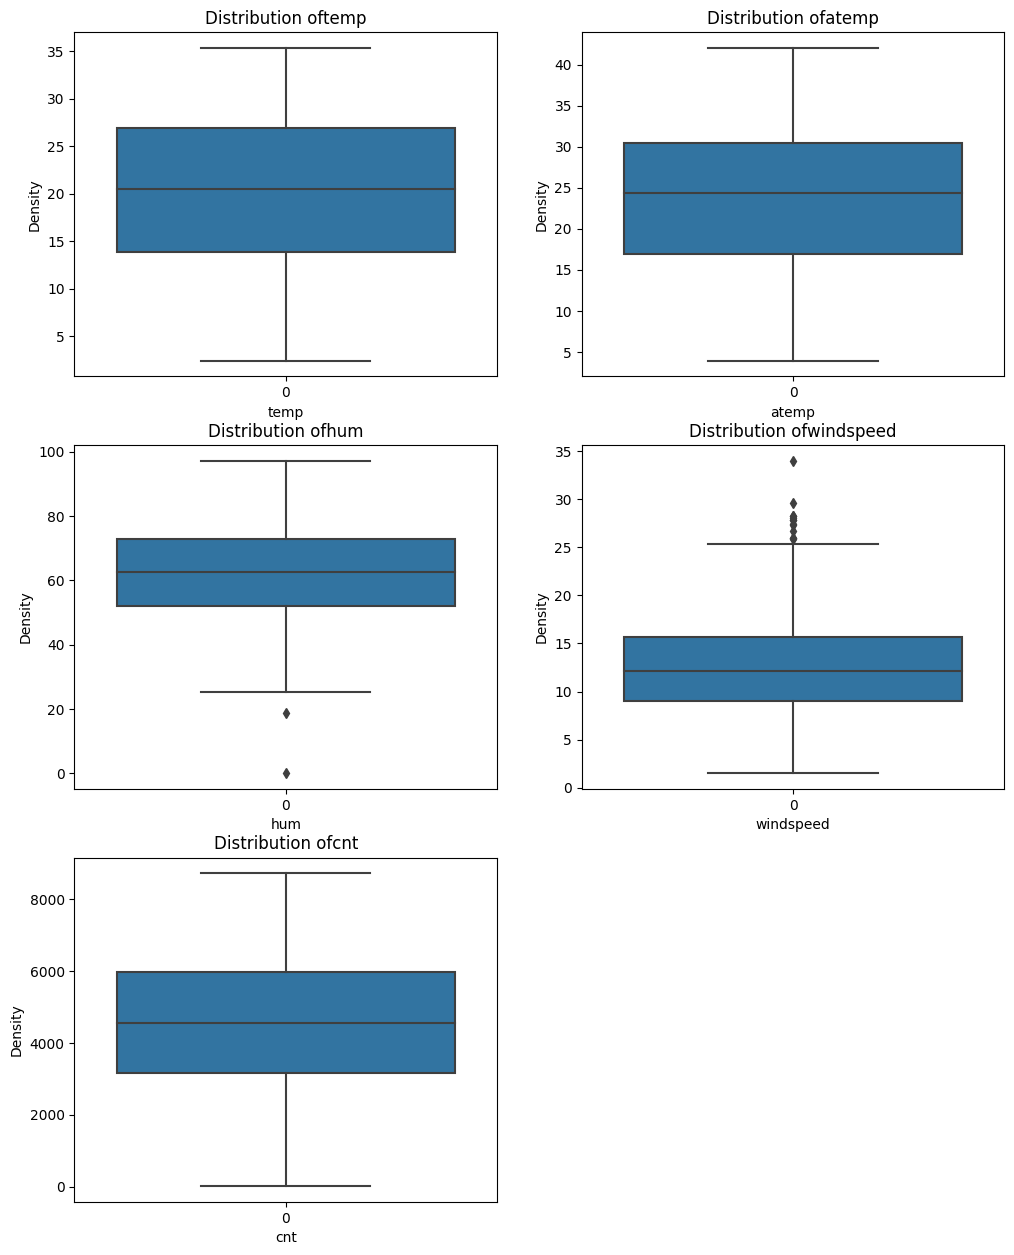

In [ ]:
Continous_Variables = ['temp', 'atemp', 'hum', 'windspeed', 'cnt'] 
plt.figure(figsize=(12,18)) 
for i,v in enumerate(Continous_Variables):
  plt.subplot(4,2,i+1) 
  sns.boxplot(day[v]) 
  plt.title('Distribution of'+v) 
  plt.xlabel(v) 
  plt.ylabel('Density') 
  plt.subplots_adjust(bottom=0.001) 
plt.show()

From the above graphs we can infer that humidity and windspeed has some outliers

In [ ]:
print(np.where(day.windspeed >= 25))
print(np.where(day.hum <= 20))

(array([ 44,  49,  93,  94, 238, 292, 377, 382, 407, 420, 431, 432, 449,
       665, 692, 719, 720]),)
(array([49, 68]),)


Since the amount of values that are outlying is very low and we can see there is no significant abnormal outlier value. So we will leave it as it is

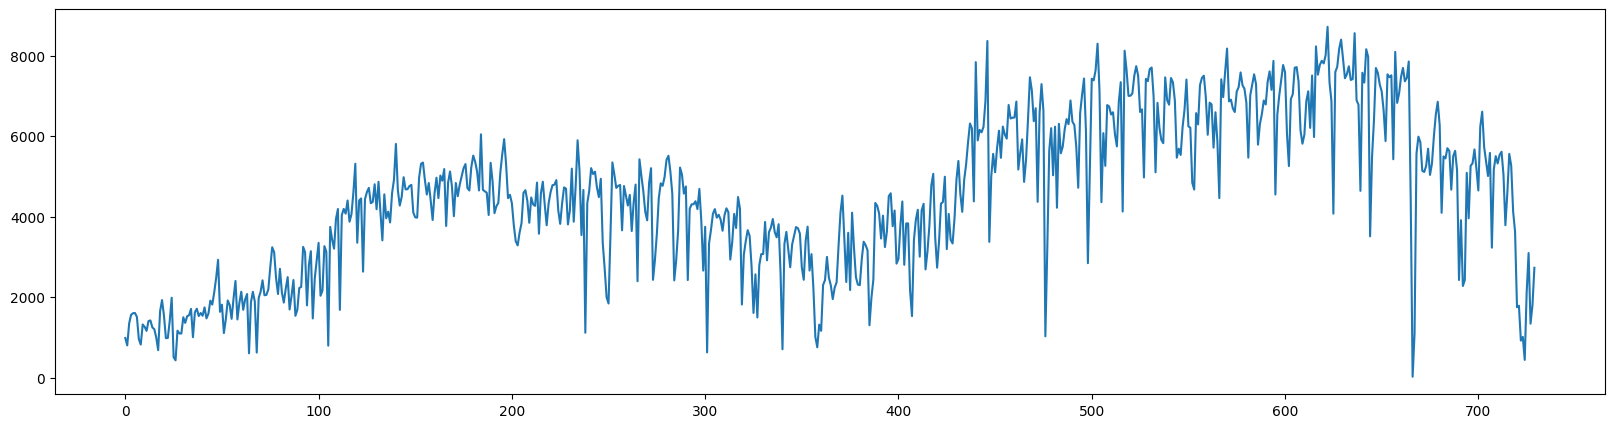

In [ ]:
#Check the behaviour of the target variable
plt.figure(figsize=(20,5)) 
plt.plot(day.cnt) #cnt is target variable
plt.show()

In [ ]:
#identify categorical variable and numerical variable
cat_var = ["season", "yr", "mnth", "holiday", "weekday", "workingday", "weathersit"]
cat_var_xtick_rotation=[False,False,True,False,False,False,False]
num_var = ['temp', 'atemp', 'hum', 'windspeed', 'cnt']
len(num_var)

5

Univariate Analysis for Categorical variables

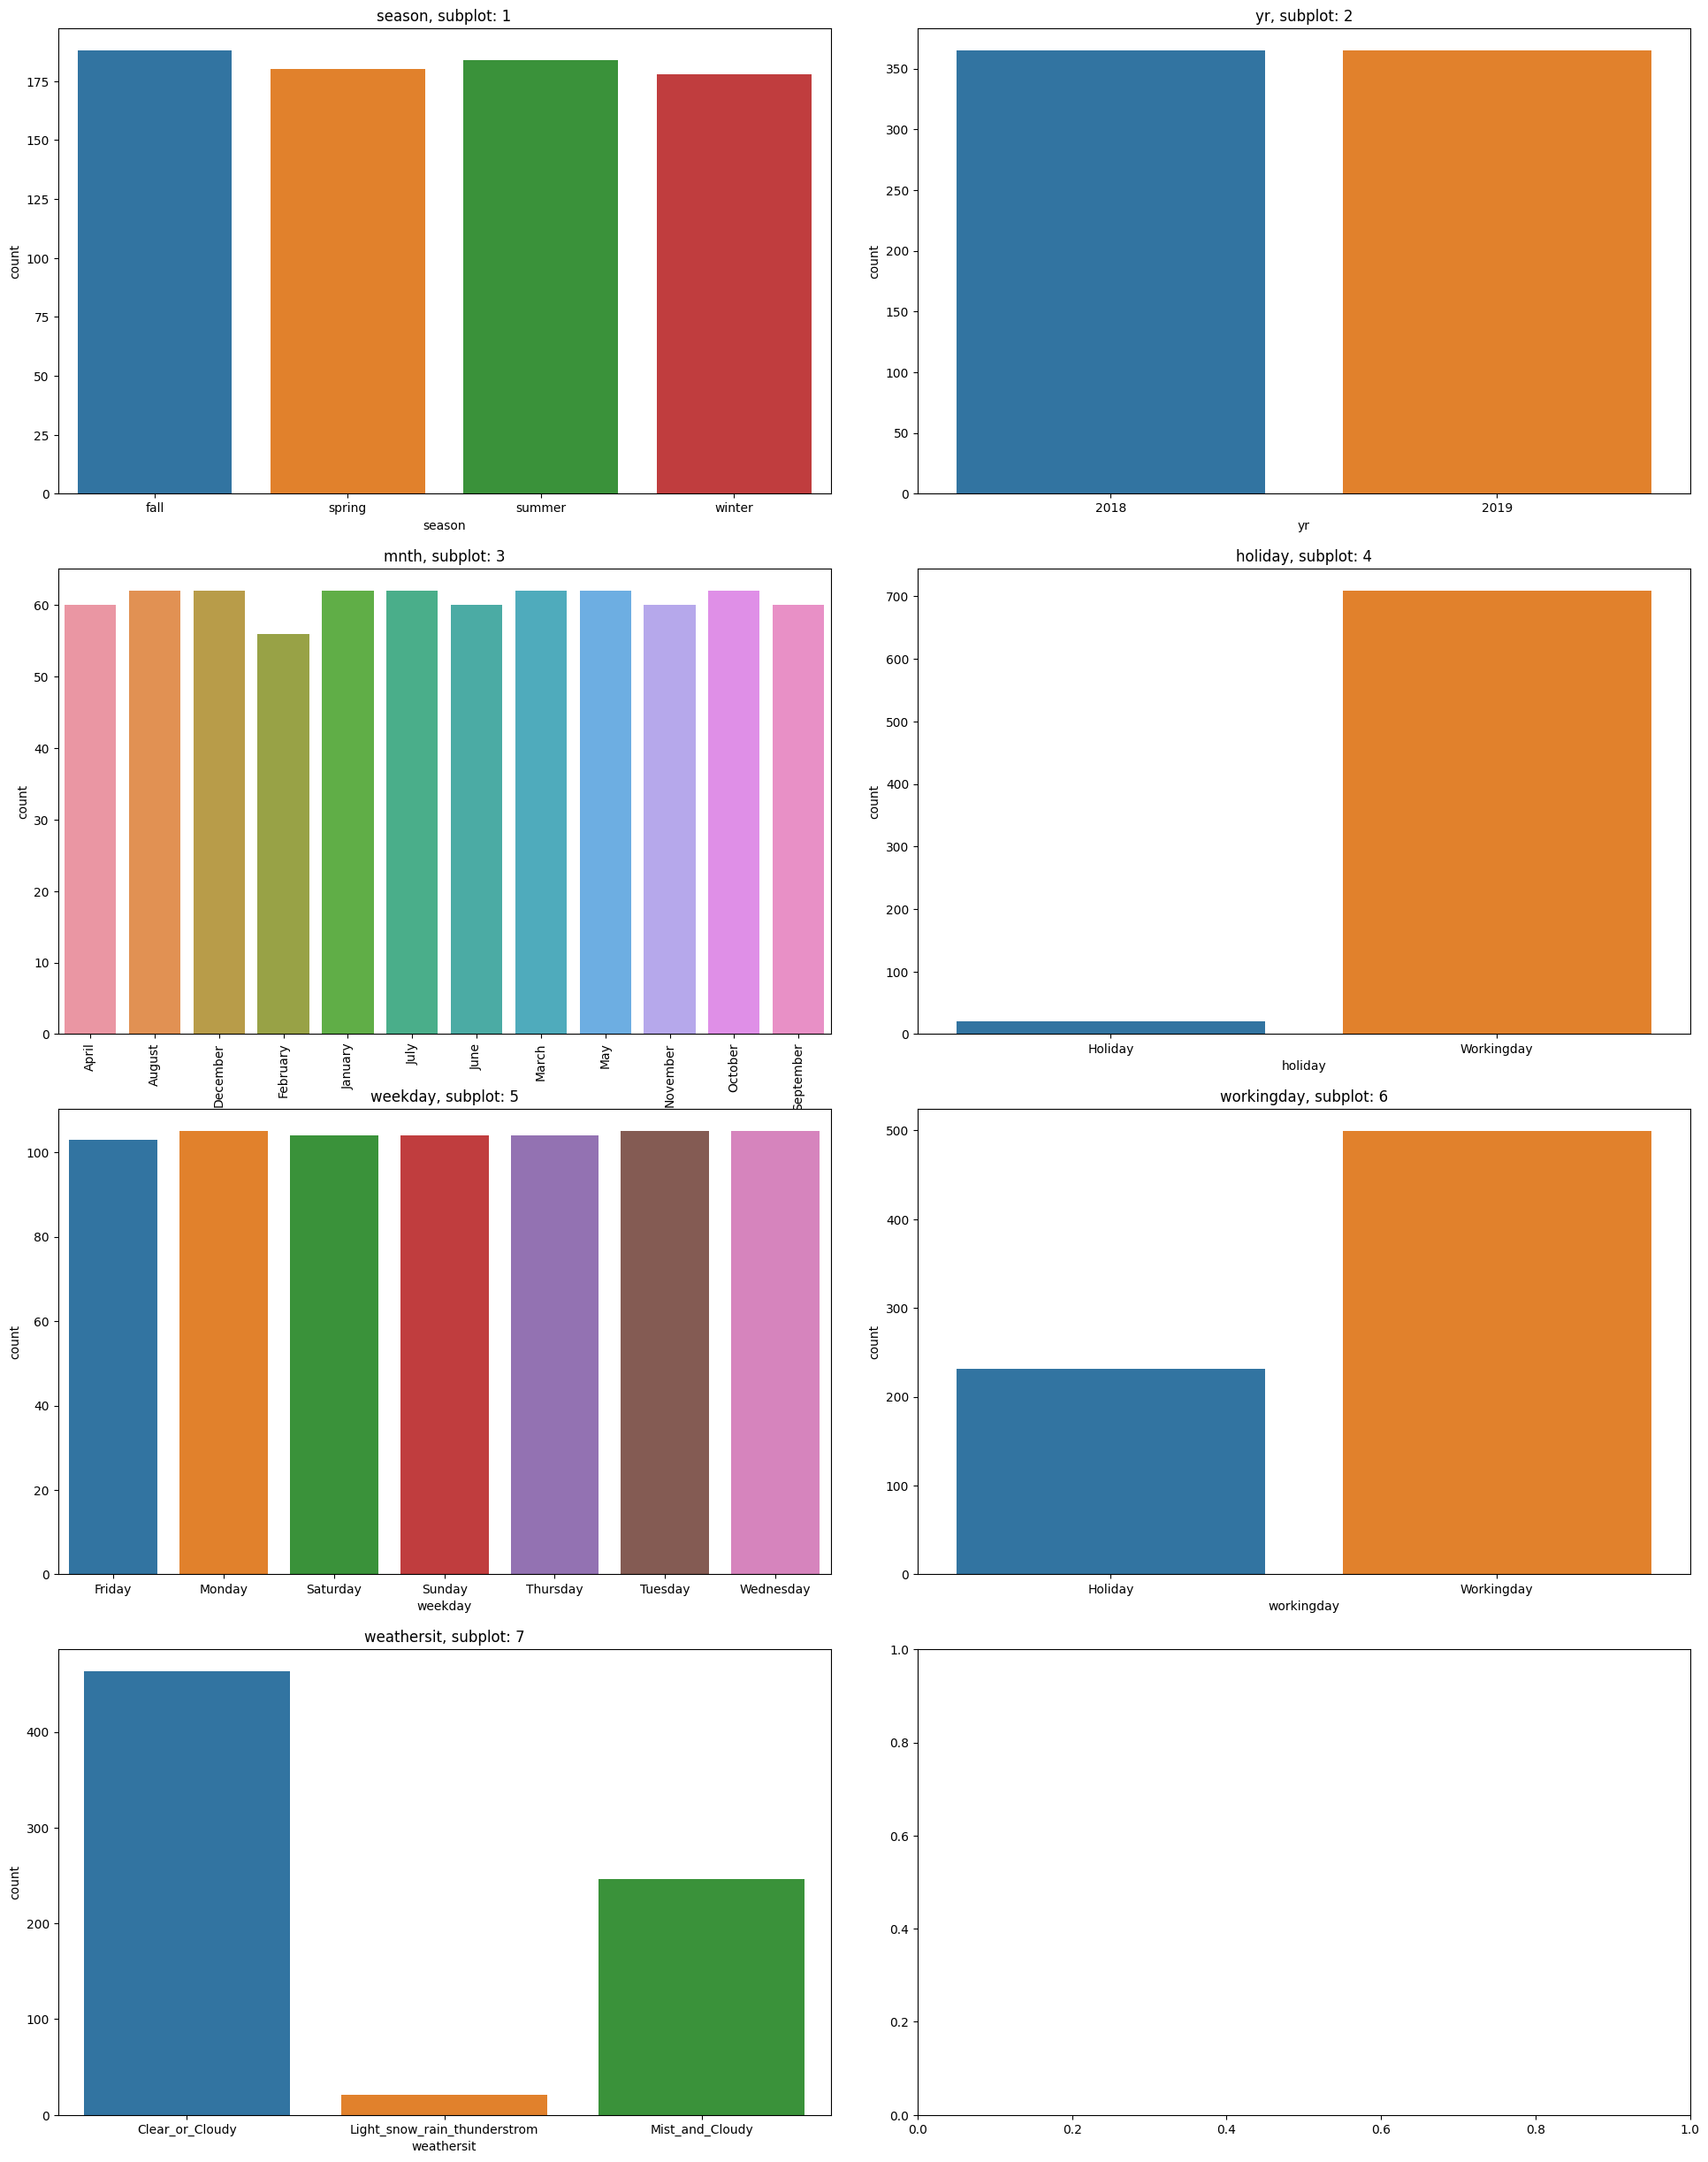

In [ ]:
a = 4  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter
k = 0  # initialize list counter

fig, ax=plt.subplots(a, b, figsize=(30,20))
fig.set_size_inches(20, 25)
fig.tight_layout(pad=4)

for i in range(0,a):
    for j in range(0,b):
      if k<len(cat_var):
        ax[i][j].title.set_text('{}, subplot: {}'.format(cat_var[k], c))
        sns.countplot(data = day.sort_values(by=cat_var[k]), 
              x=cat_var[k],ax=ax[i][j])
        if cat_var_xtick_rotation[k]:
            ax[i][j].tick_params('x', labelrotation=90)
      else:
        break
      c = c + 1
      k = k + 1
      
plt.show();



*   Seasons: We could see business was operating similar days in all four seasons
*   Yr: Number of days operation in both the year are almost same.
*   Month: We could see business was operating similar days in all 12 months.
*  Holiday: Business was operating in very less days of holiday compared to working day


*   weekdays: We could see business was operating similar percentage in all weekdays.

*  Workingday: Bisuness was operating in 60% in workign days and 40% in nonworking days.

*   Weathersit: From the above analaysis it is being observed that there is no data for 4th category of weathersit i.e Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog.May be the company is not operating on those days or there was no demand of bike and clear and cloudy day had highest demand
















Univariate analysis on Numeric variables

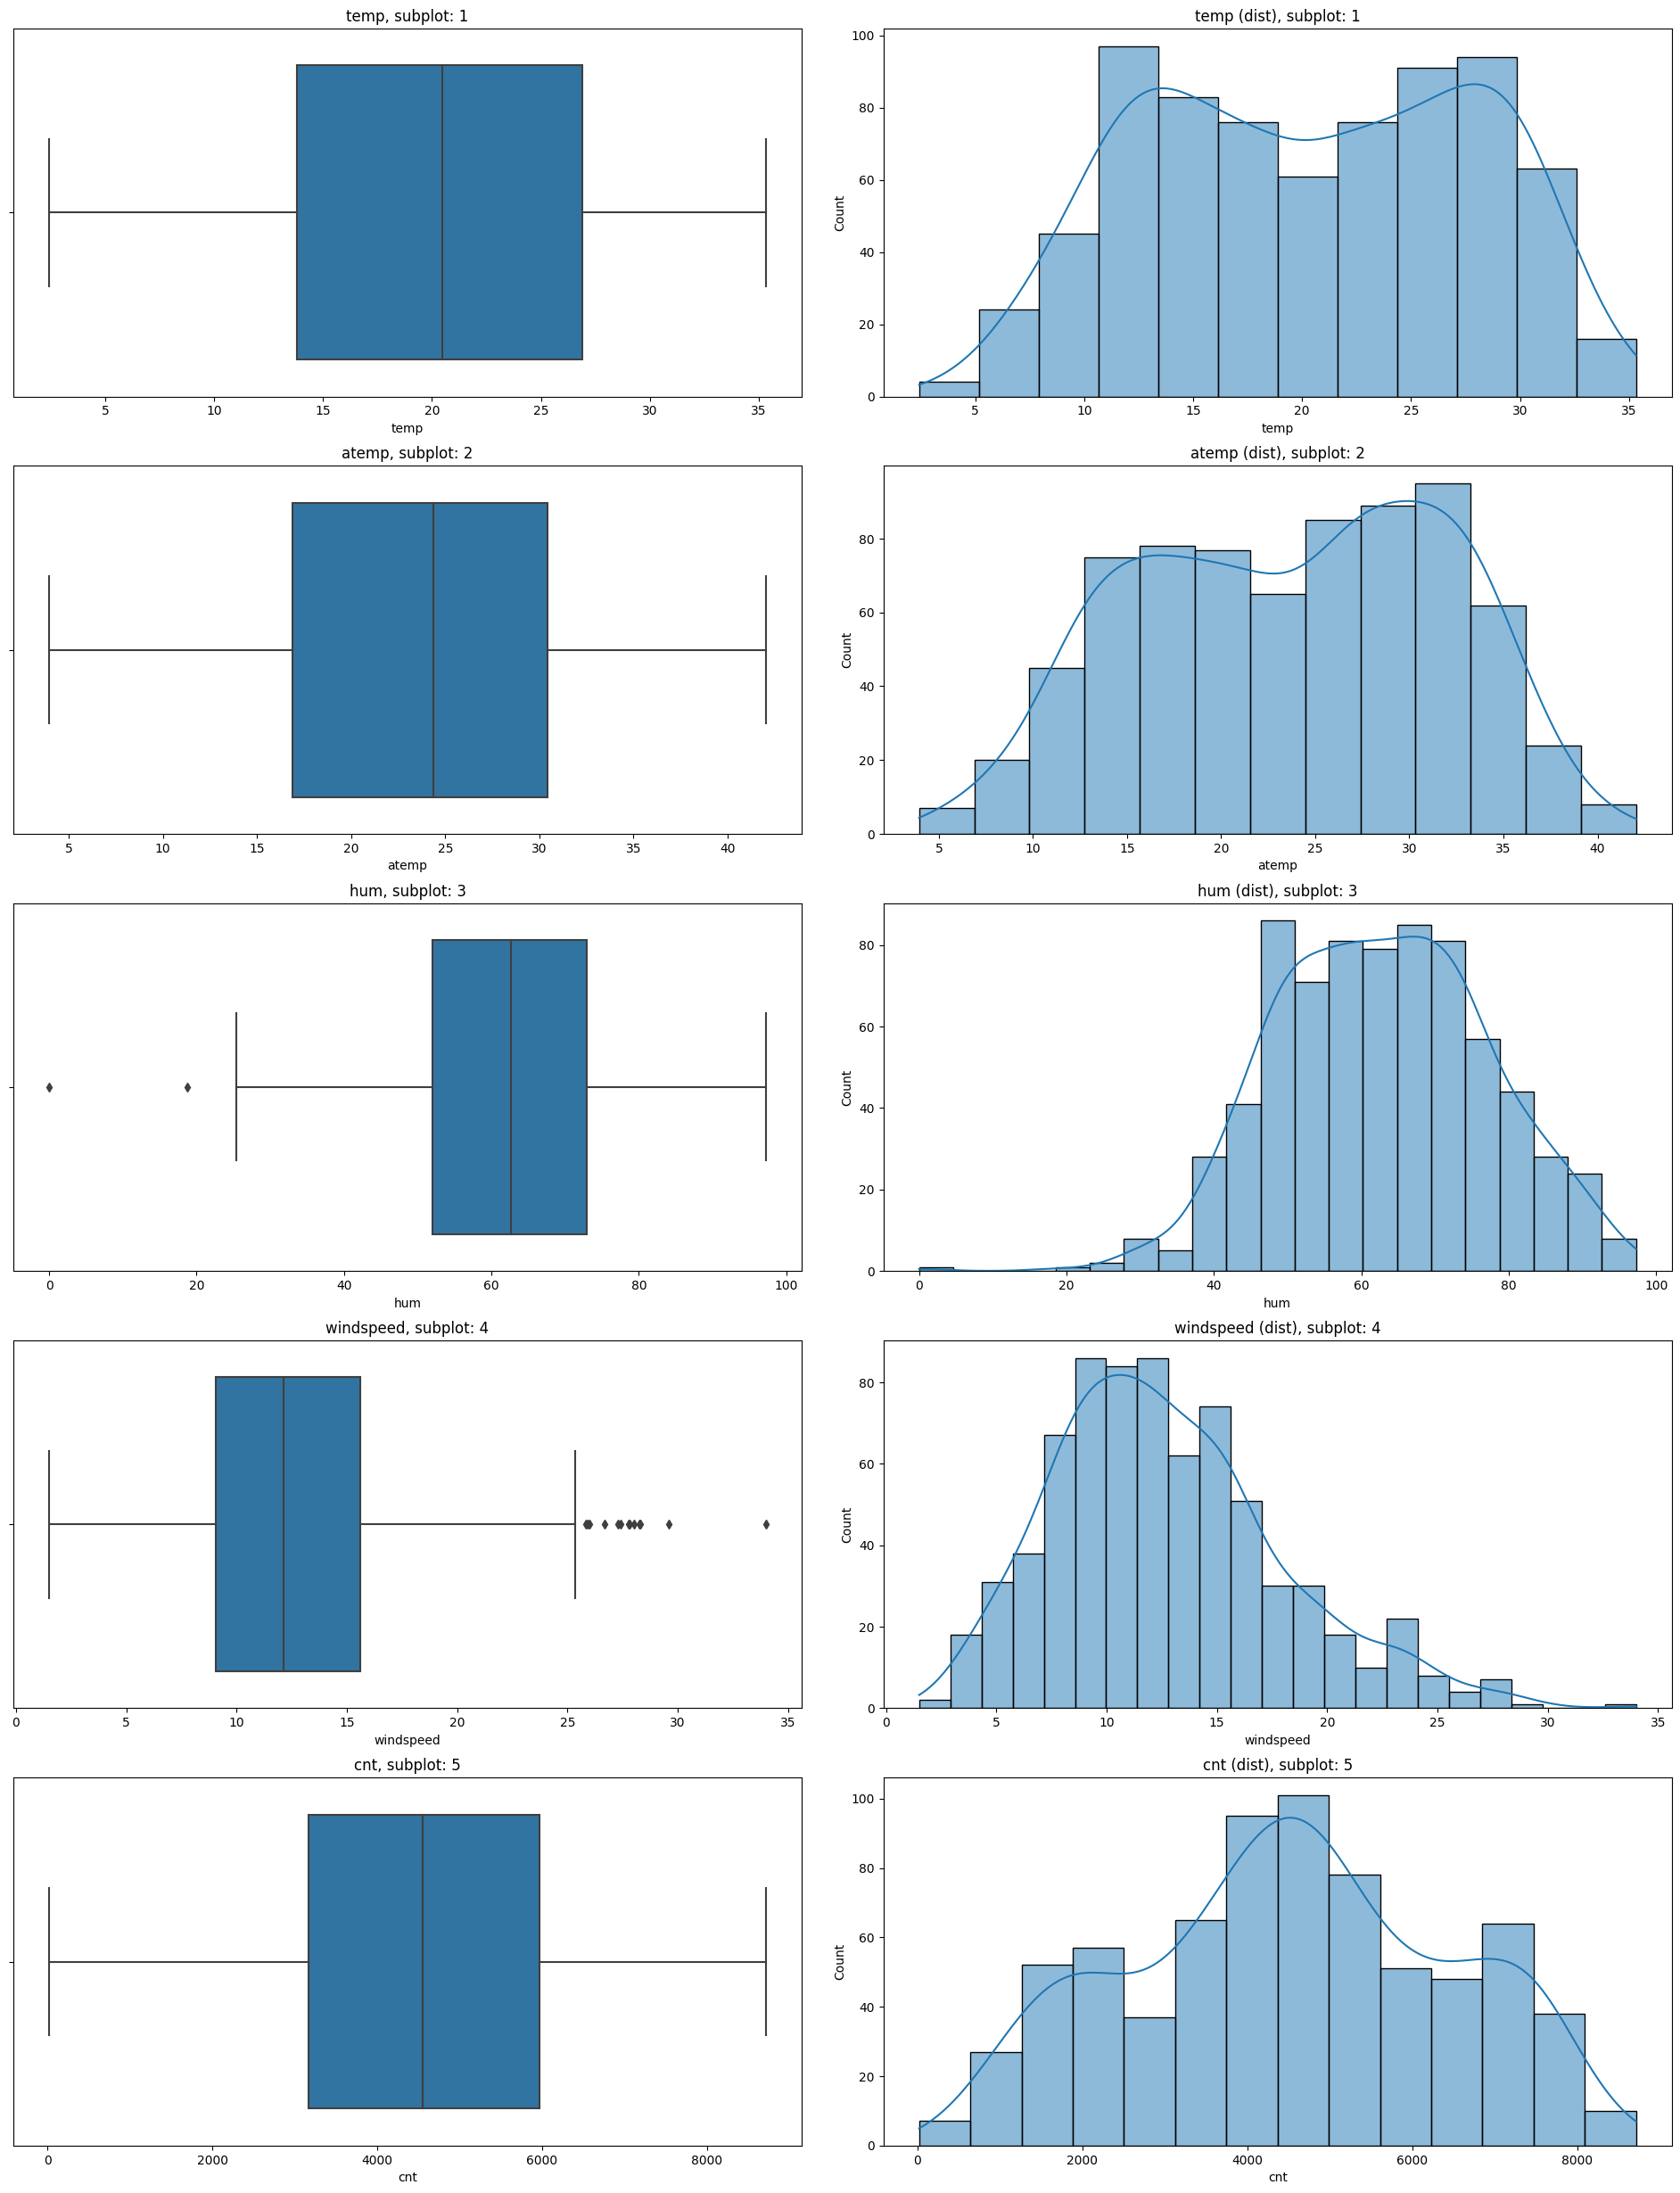

In [ ]:
# Plotting for num_col1
a = 5  # number of rows
b = 2  # number of columns
c = 1  # initialize plot counter
k = 0  # initialize list counter

fig, ax=plt.subplots(a, b, figsize=(100,80))
fig.set_size_inches(20, 25)
fig.tight_layout(pad=3.5)


for i in range(0,a):
    if k<len(num_var):
      ax[i][0].title.set_text('{}, subplot: {}'.format(num_var[k], c))
      sns.boxplot(x=day[num_var[k]],ax=ax[i][0])

      ax[i][1].title.set_text('{} (dist), subplot: {}'.format(num_var[k], c))
      sns.histplot(x=day[num_var[k]],ax=ax[i][1],kde=True)
    else:
      break

    c = c + 1
    k = k + 1

plt.show();

Insights from the above grahps are:-
*   The values of temp ranges between 15 to 26
*   The values of temp ranges between 18 to 32
*   The values of hum ranges between 55 to 70
*   The values of windspeed ranges between 9 to 15
*   The values of cnt ranges between 35000 to 50000








Bivariate Analysis

Visualize numeric variables and check if there is any linear behaviour 

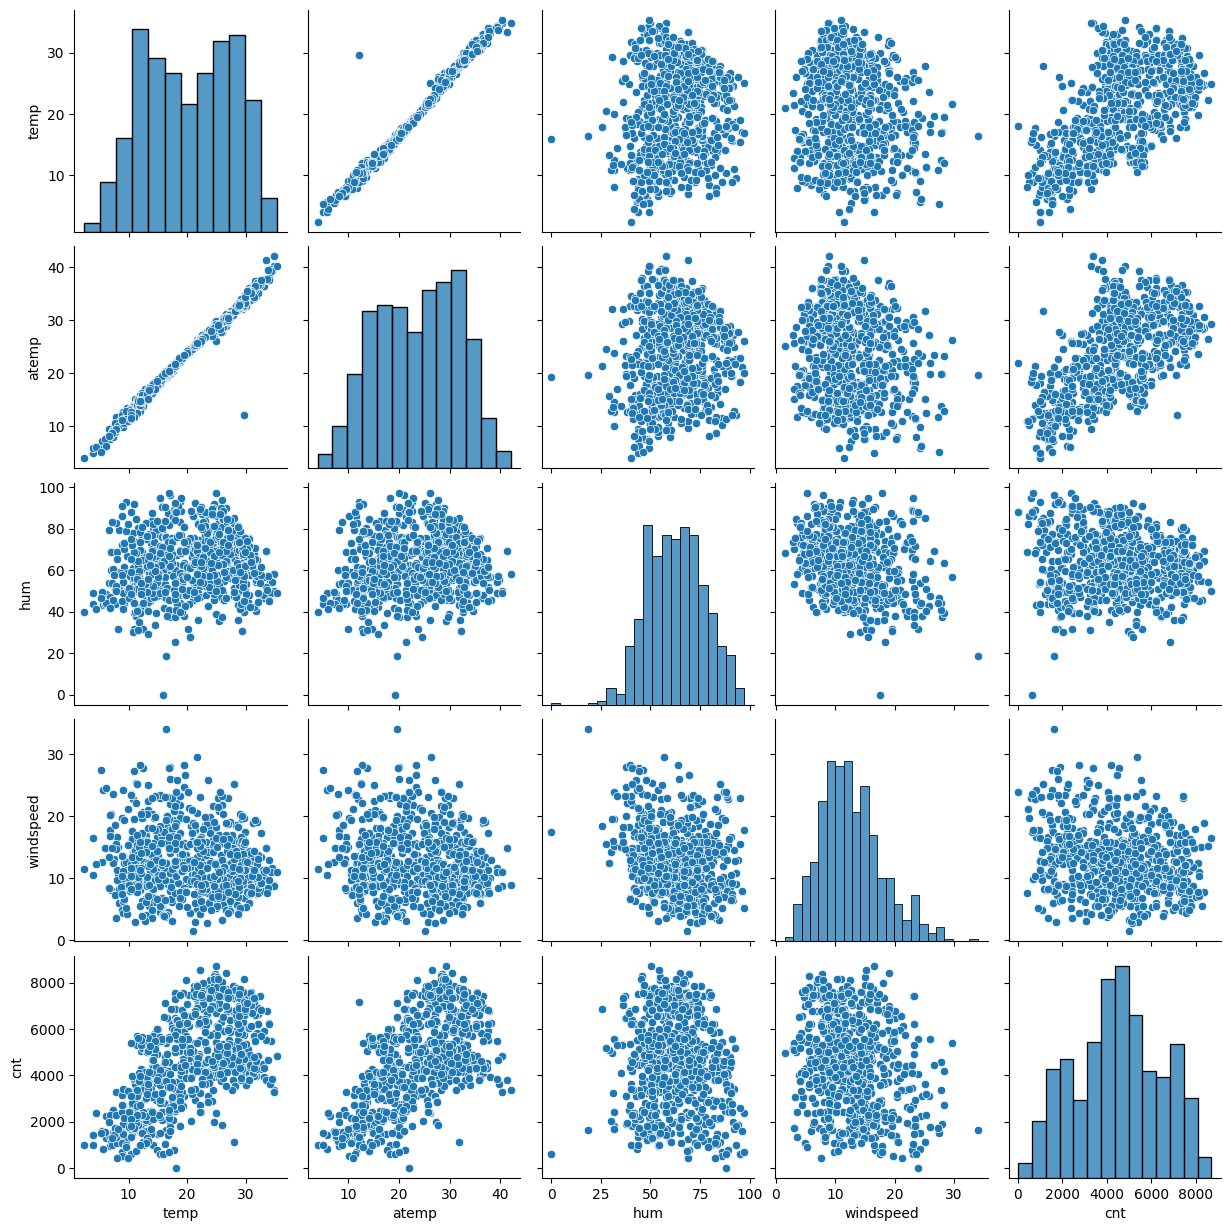

In [ ]:
sns.pairplot(day)
plt.show()

Insights :
In this dataset cnt(count of bikes) is the target variable and from above graph we could see that there is a linear relationship between cnt and temp,
cnt and atemp.

Visualize Categorical Variable with respect to target variable

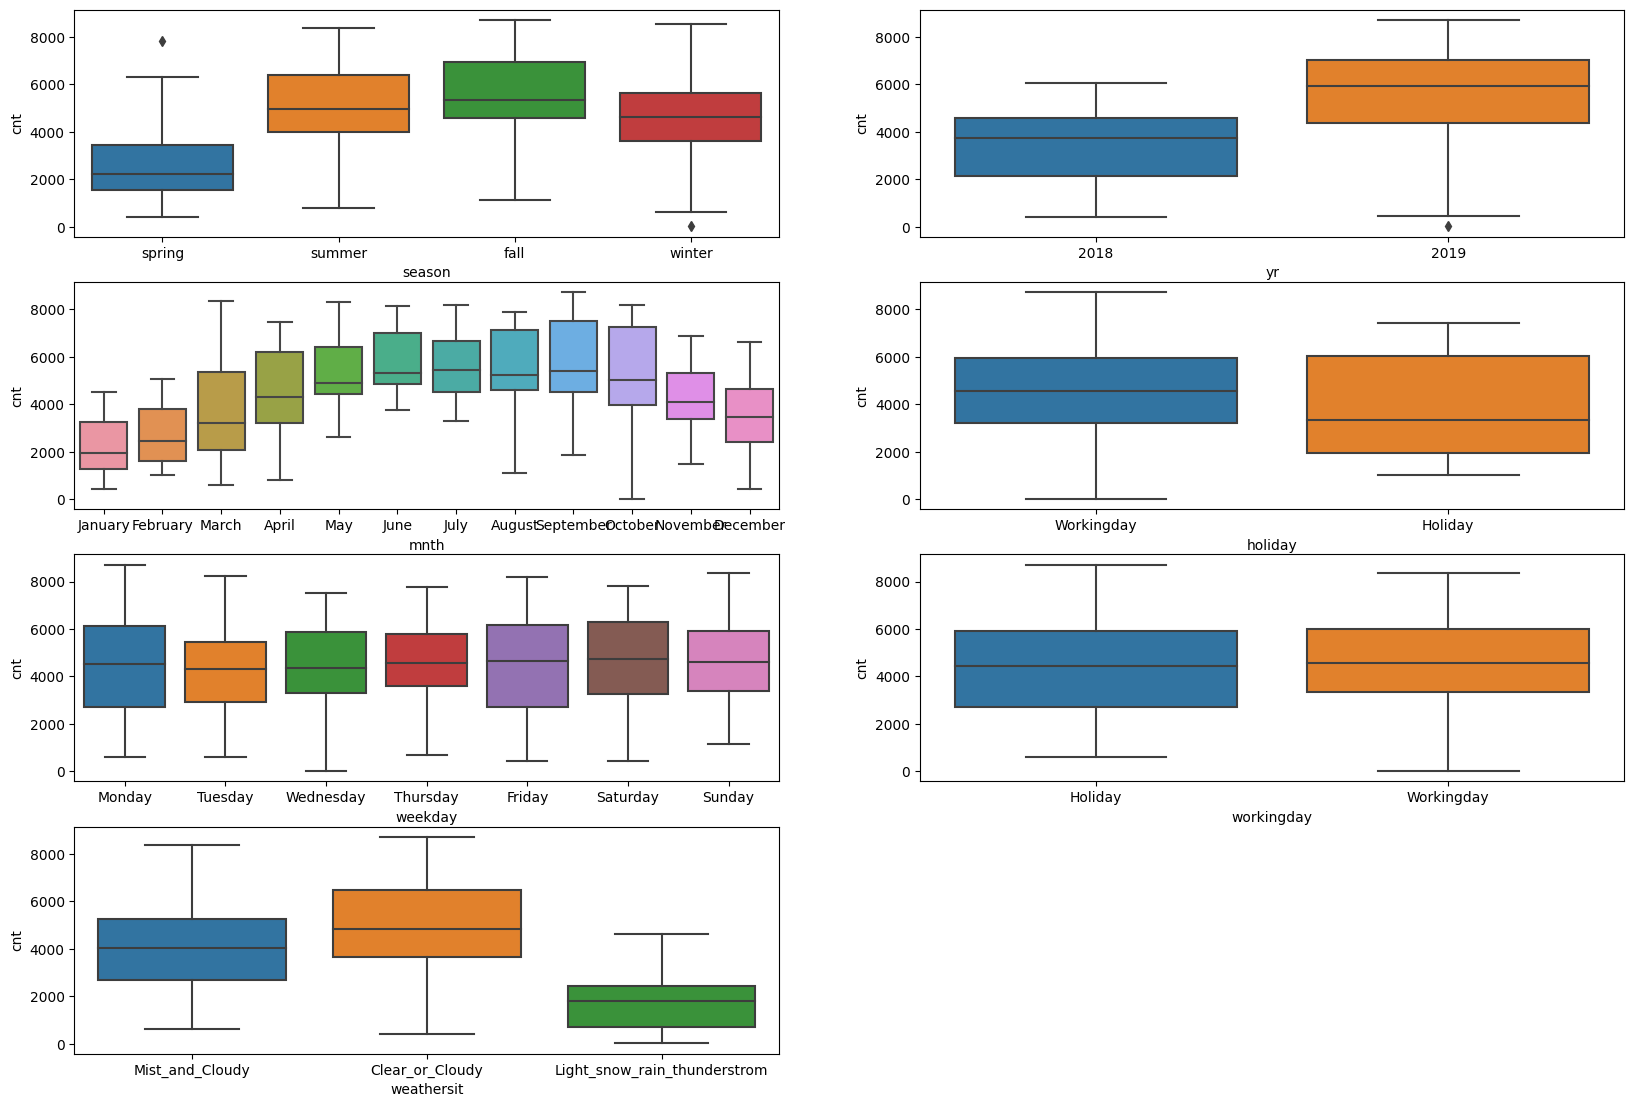

In [ ]:
plt.figure(figsize = (20,12))
plt.subplot(4,2,1)
sns.boxplot(x= 'season',y = 'cnt',data =day)
plt.subplot(4,2,2)
sns.boxplot(x= 'yr',y = 'cnt',data =day)
plt.subplot(4,2,3)
sns.boxplot(x= 'mnth',y = 'cnt',data =day)
plt.subplot(4,2,4)
sns.boxplot(x= 'holiday',y = 'cnt',data =day)
plt.subplot(4,2,5)
sns.boxplot(x= 'weekday',y = 'cnt',data =day)
plt.subplot(4,2,6)
sns.boxplot(x= 'workingday',y = 'cnt',data =day)
plt.subplot(4,2,7)
sns.boxplot(x= 'weathersit',y = 'cnt',data =day)
plt.subplots_adjust(bottom=0.01)
plt.show()

Innsights from the plots are as follows:-

 

*   The demad of bike is less in the month of spring when compared with other seasons.
*   The demand bike increased in the year 2019 when compared with year 2018.
*   Month Jun to Sep is the period when bike demand is high. The Month Jan is the lowest demand month.
*   Bike demand is less in holidays in comparison to not being holiday.
*   The demand of bike is almost similar throughout the weekdays.
*   There is no significant change in bike demand with workign day and non working day.
*   The bike demand is high when weather is clear and Few clouds however demand is less in case of Lightsnow and light rainfall. We do not have any dat for Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog , so we can not derive any conclusion. May be the company is not operating on those days or there is no demand of bike.


















In [ ]:
#holiday andworking day columns seems to give similar data of weather its a working day of holiday hence dropping holiday
day = day.drop(['holiday'],axis = 1)

**Step 2 : Preparaing the data for modelling**

-Encoding:

-converting binary vars to 1/0

-other categorical variables to dummy variables

(coverting non numeric to numeric variables)

Creating Dummy Varibales

In [ ]:
#handling categorical columns by creating dummy variables
cols_to_dummies = ['season','weathersit','weekday','mnth','yr','workingday']
day_with_dummies = pd.get_dummies(day, columns=cols_to_dummies, drop_first=True)
day_with_dummies_and_original = pd.concat([day[cols_to_dummies], day_with_dummies], axis=1)

In [ ]:
#concatinating the dummy variables to the original dataframe
day =  pd.concat([day[cols_to_dummies], day_with_dummies], axis=1)
day.head()

,season,weathersit,weekday,mnth,yr,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_Light_snow_rain_thunderstrom,weathersit_Mist_and_Cloudy,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,yr_2019,workingday_Workingday
0,spring,Mist_and_Cloudy,Monday,January,2018,Holiday,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,spring,Mist_and_Cloudy,Tuesday,January,2018,Holiday,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,spring,Clear_or_Cloudy,Wednesday,January,2018,Workingday,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
3,spring,Clear_or_Cloudy,Thursday,January,2018,Workingday,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,spring,Clear_or_Cloudy,Friday,January,2018,Workingday,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


In [ ]:
#Dropping the original categorical variables
original_cols = ['season','weathersit','weekday','mnth','yr','workingday']
day = day.drop(day[original_cols], axis = 1)
day.head()

,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_Light_snow_rain_thunderstrom,weathersit_Mist_and_Cloudy,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,yr_2019,workingday_Workingday
0,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1
3,8.200000,10.60610,59.0435,10.739832,1562,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1
4,9.305237,11.46350,43.6957,12.522300,1600,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1


Splitting Test and Train data set

Model building using Sklearn and Variable selection using RFE

In [ ]:
df_train_sk,df_test_sk = train_test_split(day,train_size = 0.7,test_size = 0.3,random_state = 100)

Scaling the variables

In [ ]:
scaler = MinMaxScaler()

#2 Create a list of only numeric variables
num_vars = ['temp','atemp','hum','windspeed','cnt']

#3. Fit on data
#scaler.fit() :- learns xmin,xmax
#scaler.transform(): does x-xmin/xmax-xmin
#scaler.filt_transform :- does fitting and transforming both at a time
df_train_sk[num_vars] = scaler.fit_transform(df_train_sk[num_vars])
df_train_sk.head()

,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_Light_snow_rain_thunderstrom,weathersit_Mist_and_Cloudy,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,yr_2019,workingday_Workingday
653,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1
576,0.815169,0.766351,0.725633,0.264686,0.827658,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1
426,0.442393,0.438975,0.640189,0.255342,0.465255,1,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
728,0.245101,0.200348,0.498067,0.663106,0.204096,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0
482,0.395666,0.391735,0.504508,0.188475,0.482973,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


Checking correlations between the variables

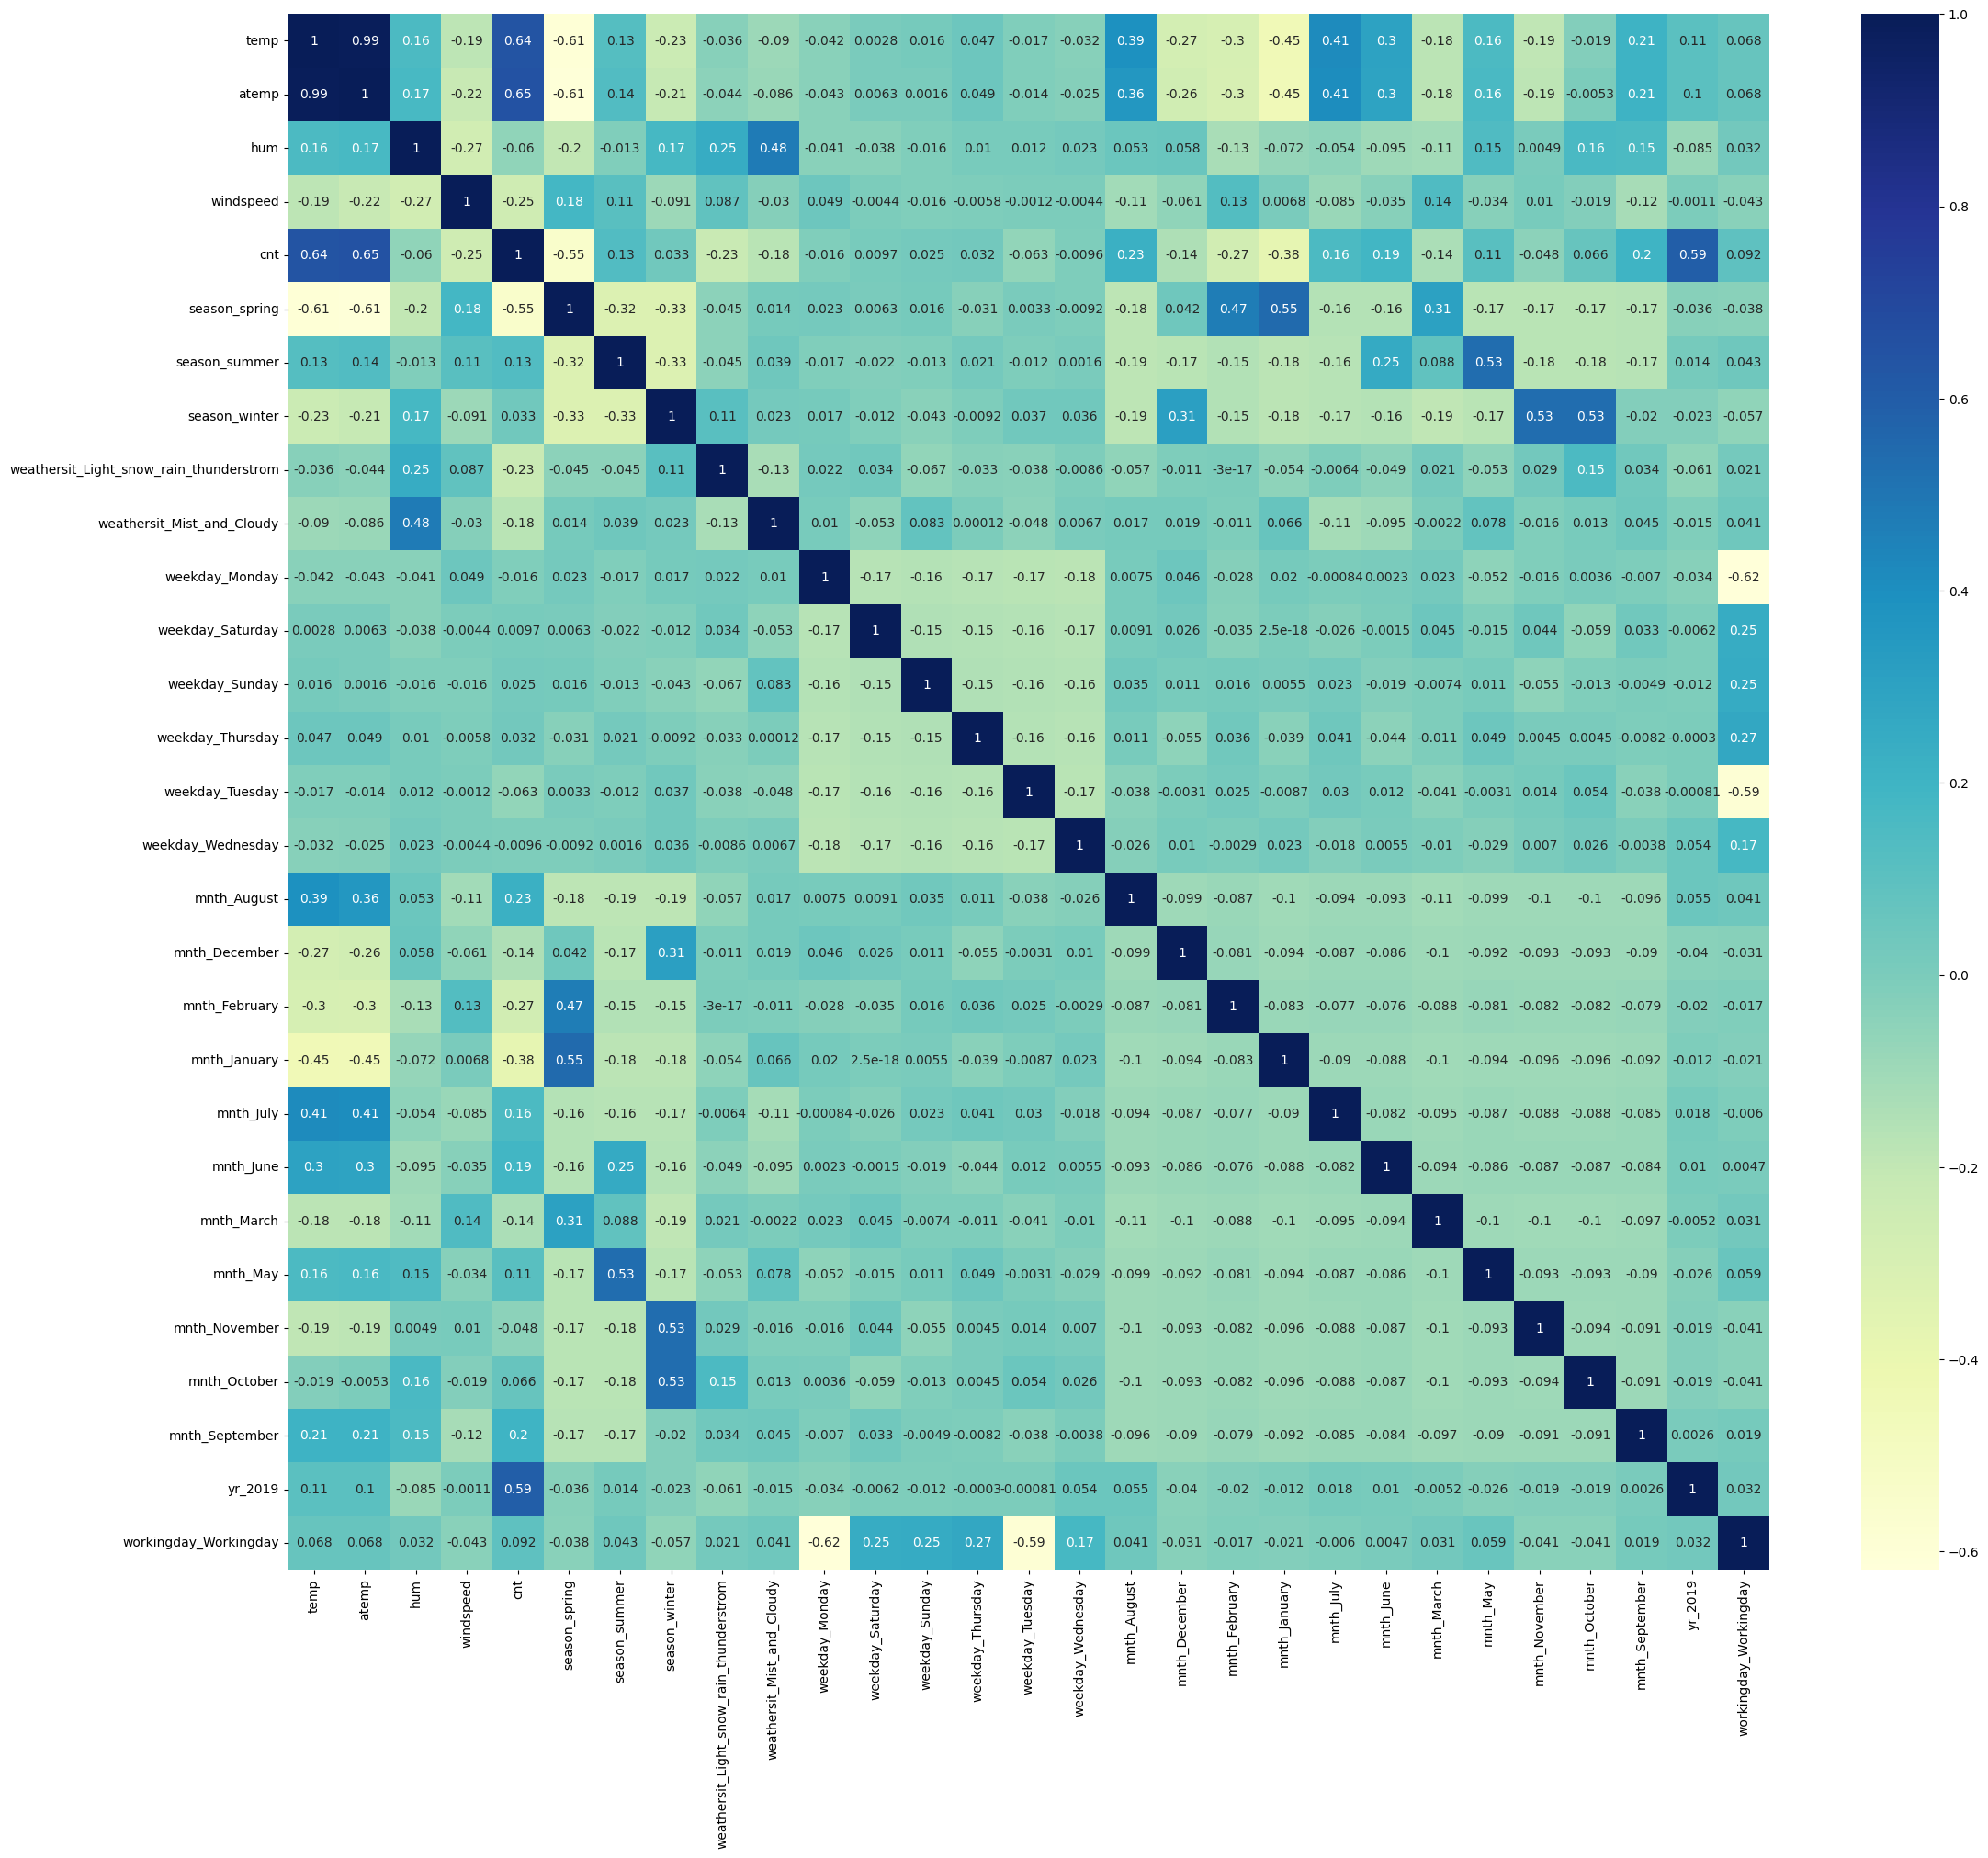

In [ ]:
plt.figure(figsize = (26,22))
sns.heatmap(df_train_sk.corr(),annot = True,cmap = "YlGnBu")
plt.show()

From above graph we can infer effect of continous variables on the target variable is as follows:-
A positive correalation observed between cnt and temp (0.64)
A positive correalation observed between cnt and atemp (0.65)
A Negative correlation observed with cnt vs hum and cnt vs windspeed (-0.06 and -0.25)

Dividing X and y from the dataset for model building

In [ ]:
y_train_sk = df_train_sk.pop("cnt")
X_train_sk = df_train_sk

In [ ]:
#Running RFE with the output number of variable equal to 10
lm = LinearRegression()
lm.fit(X_train_sk,y_train_sk)

LinearRegression()

Running RFE recursive feature selection an automated method to select the right variables to help predict the target variable


In [ ]:
rfe = RFE(estimator =lm,n_features_to_select = 15)
rfe = rfe.fit(X_train_sk,y_train_sk)

Displaying the rfe assigned ranking

In [ ]:
list(zip(X_train_sk.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', True, 1),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('weathersit_Light_snow_rain_thunderstrom', True, 1),
 ('weathersit_Mist_and_Cloudy', True, 1),
 ('weekday_Monday', True, 1),
 ('weekday_Saturday', False, 12),
 ('weekday_Sunday', False, 10),
 ('weekday_Thursday', False, 9),
 ('weekday_Tuesday', True, 1),
 ('weekday_Wednesday', False, 8),
 ('mnth_August', False, 7),
 ('mnth_December', False, 3),
 ('mnth_February', False, 4),
 ('mnth_January', True, 1),
 ('mnth_July', True, 1),
 ('mnth_June', False, 13),
 ('mnth_March', False, 14),
 ('mnth_May', False, 6),
 ('mnth_November', False, 2),
 ('mnth_October', False, 11),
 ('mnth_September', True, 1),
 ('yr_2019', True, 1),
 ('workingday_Workingday', True, 1)]

Selecting the only columns that are selcted by RFE as top variables

In [ ]:
col = X_train_sk.columns[rfe.support_]
col

Index(['temp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'weathersit_Light_snow_rain_thunderstrom',
       'weathersit_Mist_and_Cloudy', 'weekday_Monday', 'weekday_Tuesday',
       'mnth_January', 'mnth_July', 'mnth_September', 'yr_2019',
       'workingday_Workingday'],
      dtype='object')

In [ ]:
X_train_sk.columns[~rfe.support_]

Index(['atemp', 'weekday_Saturday', 'weekday_Sunday', 'weekday_Thursday',
       'weekday_Wednesday', 'mnth_August', 'mnth_December', 'mnth_February',
       'mnth_June', 'mnth_March', 'mnth_May', 'mnth_November', 'mnth_October'],
      dtype='object')

Building model using model for detailed statistics

In [ ]:
#Creating X_test dataframe using RFE selected variables
X_train_rfe = X_train_sk[col]

In [ ]:
#Adding constant
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)

In [ ]:
#running linear model
lm = sm.OLS(y_train_sk,X_train_rfe).fit() 

In [ ]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.849
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     184.6
Date:                Tue, 11 Apr 2023   Prob (F-statistic):          2.31e-191
Time:                        06:42:09   Log-Likelihood:                 519.88
No. Observations:                 510   AIC:                            -1008.
Df Residuals:                     494   BIC:                            -940.0
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

For Manual variable selection run VIF

In [ ]:
vif = pd.DataFrame()
vif['features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF' , ascending = False)
vif

,features,VIF
0,const,116.69
15,workingday_Workingday,9.07
9,weekday_Monday,6.06
10,weekday_Tuesday,5.74
4,season_spring,5.08
1,temp,3.89
6,season_winter,3.60
5,season_summer,2.64
2,hum,1.92
8,weathersit_Mist_and_Cloudy,1.57


In [ ]:
#To select the variables manually following are the rules used:-
#variables having high P > 0.05 value and high VIF > 5 remove these first 
#High p value and low VIF :- remove these 2nd
#Low p value and high VIF :- remove these last
#low p value and low VIF :- dont remove

In [ ]:
X_train_rfe = X_train_rfe.drop(['mnth_January'],axis = 1) #mnth_january has comparetively high p value hence deleteing this first

In [ ]:
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train_sk,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.843
Method:                 Least Squares   F-statistic:                     196.3
Date:                Tue, 11 Apr 2023   Prob (F-statistic):          1.13e-191
Time:                        06:52:13   Log-Likelihood:                 517.87
No. Observations:                 510   AIC:                            -1006.
Df Residuals:                     495   BIC:                            -942.2
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [ ]:
#no major  variation in the Adjusted R2 value and F-statictics has improved so dropping this variable has no impact
#checking if VIF has improved

In [ ]:
vif = pd.DataFrame()
vif['features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF' , ascending = False)
vif

,features,VIF
0,const,114.08
14,workingday_Workingday,9.07
9,weekday_Monday,6.06
10,weekday_Tuesday,5.74
4,season_spring,5.02
1,temp,3.62
6,season_winter,3.49
5,season_summer,2.61
2,hum,1.91
8,weathersit_Mist_and_Cloudy,1.57


In [ ]:
X_train_rfe = X_train_rfe.drop(['weekday_Tuesday'],axis = 1)

In [ ]:
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train_sk,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.846
Model:                            OLS   Adj. R-squared:                  0.842
Method:                 Least Squares   F-statistic:                     209.4
Date:                Tue, 11 Apr 2023   Prob (F-statistic):          8.51e-192
Time:                        07:17:39   Log-Likelihood:                 515.37
No. Observations:                 510   AIC:                            -1003.
Df Residuals:                     496   BIC:                            -943.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [ ]:
vif = pd.DataFrame()
vif['features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF' , ascending = False)
vif


,features,VIF
0,const,81.13
4,season_spring,5.02
1,temp,3.62
6,season_winter,3.49
5,season_summer,2.61
2,hum,1.91
13,workingday_Workingday,1.65
9,weekday_Monday,1.64
8,weathersit_Mist_and_Cloudy,1.57
10,mnth_July,1.49


In [ ]:
X_train_rfe = X_train_rfe.drop(['season_spring'],axis = 1)

In [ ]:
import statsmodels.api as sm
X_train_rfe = sm.add_constant(X_train_rfe)
lm = sm.OLS(y_train_sk,X_train_rfe).fit()
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     223.3
Date:                Tue, 11 Apr 2023   Prob (F-statistic):          2.26e-191
Time:                        07:18:27   Log-Likelihood:                 511.55
No. Observations:                 510   AIC:                            -997.1
Df Residuals:                     497   BIC:                            -942.1
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------

In [ ]:
vif = pd.DataFrame()
vif['features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values,i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'],2)
vif = vif.sort_values(by = 'VIF' , ascending = False)
vif

,features,VIF
0,const,51.12
2,hum,1.89
12,workingday_Workingday,1.65
8,weekday_Monday,1.64
1,temp,1.60
7,weathersit_Mist_and_Cloudy,1.56
9,mnth_July,1.43
4,season_summer,1.33
5,season_winter,1.29
6,weathersit_Light_snow_rain_thunderstrom,1.24


Residual Analysis on the train data

In [ ]:
y_train_cnt = lm.predict(X_train_rfe)

<Figure size 640x480 with 0 Axes>

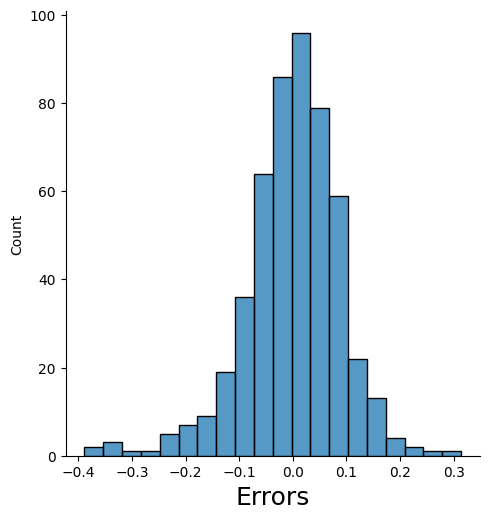

In [ ]:
fig = plt.figure()
#RS = y_train_sk - y_train_cnt
sns.displot((y_train_sk - y_train_cnt),bins = 20)
#sns.displot(RS)
fig.suptitle('Error Terms',fontsize = 20)
plt.xlabel('Errors',fontsize = 18)
plt.show()

Applying scaling on the test data

In [ ]:
num_vars = ['temp','atemp','hum','windspeed','cnt']

#Transform
df_test_sk[num_vars] = scaler.transform(df_test_sk[num_vars])
df_test_sk.head()

,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_Light_snow_rain_thunderstrom,weathersit_Mist_and_Cloudy,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,yr_2019,workingday_Workingday
184,0.831783,0.769660,0.657364,0.084219,0.692706,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0
535,0.901354,0.842587,0.610133,0.153728,0.712034,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1
299,0.511964,0.496145,0.837699,0.334206,0.303382,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1
221,0.881625,0.795343,0.437098,0.339570,0.547400,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
152,0.817246,0.741471,0.314298,0.537414,0.569029,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1


In [ ]:
df_test_sk.describe()

,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,weathersit_Light_snow_rain_thunderstrom,weathersit_Mist_and_Cloudy,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,mnth_August,mnth_December,mnth_February,mnth_January,mnth_July,mnth_June,mnth_March,mnth_May,mnth_November,mnth_October,mnth_September,yr_2019,workingday_Workingday
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.558941,0.532991,0.638508,0.313350,0.520592,0.255708,0.264840,0.232877,0.027397,0.319635,0.118721,0.164384,0.178082,0.164384,0.146119,0.127854,0.059361,0.086758,0.100457,0.077626,0.105023,0.095890,0.054795,0.086758,0.073059,0.082192,0.086758,0.479452,0.698630
std,0.233698,0.217888,0.148974,0.159947,0.218435,0.437258,0.442259,0.423633,0.163612,0.467403,0.324202,0.371472,0.383458,0.371472,0.354034,0.334692,0.236840,0.282125,0.301297,0.268194,0.307285,0.295115,0.228100,0.282125,0.260830,0.275286,0.282125,0.500722,0.459904
min,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
max,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Dividing test data into X_test and y_test

In [ ]:
y_test_sk = df_test_sk.pop('cnt')
X_test_sk = df_test_sk

Model prediction

In [ ]:
X_test_sk_new = X_test_sk[col]
X_test_sk_new.columns

Index(['temp', 'hum', 'windspeed', 'season_spring', 'season_summer',
       'season_winter', 'weathersit_Light_snow_rain_thunderstrom',
       'weathersit_Mist_and_Cloudy', 'weekday_Monday', 'weekday_Tuesday',
       'mnth_January', 'mnth_July', 'mnth_September', 'yr_2019',
       'workingday_Workingday'],
      dtype='object')

In [ ]:
X_test_sk_new = X_test_sk_new.drop(['mnth_January','season_spring','weekday_Tuesday'],axis = 1)
X_test_sk_new.columns

Index(['temp', 'hum', 'windspeed', 'season_summer', 'season_winter',
       'weathersit_Light_snow_rain_thunderstrom', 'weathersit_Mist_and_Cloudy',
       'weekday_Monday', 'mnth_July', 'mnth_September', 'yr_2019',
       'workingday_Workingday'],
      dtype='object')

In [ ]:
X_test_sk_new = sm.add_constant(X_test_sk_new) #Add constant to the test

In [ ]:
y_pred_sk = lm.predict(X_test_sk_new) #predict on y pred using test data

Model Evaluation

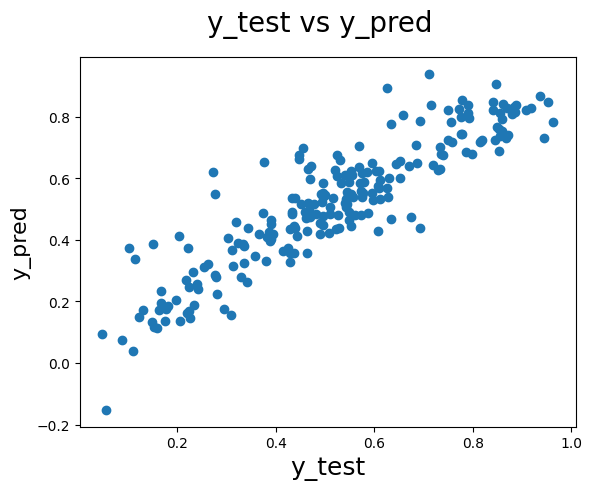

In [ ]:
fig = plt.figure()
plt.scatter(y_test_sk , y_pred_sk)
fig.suptitle('y_test vs y_pred',fontsize = 20)
plt.xlabel('y_test',fontsize = 18)
plt.ylabel('y_pred',fontsize = 16)
plt.show()

In [ ]:
r2_score(y_true = y_test_sk,y_pred = y_pred_sk)

0.8062100465610856

We can see that the equation of our best fit line is as follows:-

cnt = 0.17+0.59*temp-0.16*hum-0.18*windspeed-season_summer*0.0815+season_winter0.13- 0.24*weathersit_light_snow_rain_thunderstrom-weathersit_mist_and_cloudy*0.055+weekday_modnday*0.06-mnth_July*0.04mnth_September*0.09+yr_2019*0.22+workingday_Workingday*0.052